# 환경설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 디렉토리 변경 후 확인
!pwd
%cd /content/drive/MyDrive/Colab Notebooks/p23_BML
!pwd

/content
/content/drive/.shortcut-targets-by-id/1KwfkXpOMj0nJ1Xgddg3hRS9xKcwgXuV2/p23_BML
/content/drive/.shortcut-targets-by-id/1KwfkXpOMj0nJ1Xgddg3hRS9xKcwgXuV2/p23_BML


In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
import warnings
warnings.filterwarnings('ignore')

# 데이터로드

In [5]:
emo_df = pd.read_csv('final/data/EMOTIONS_1519.csv')
emo_df

,lyrics,track_name,artist_name,year,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise
0,Ayy,Starboy,The Weeknd,2016,4,neutral,0.607754,0.035741,0.226343,0.020135,0.040036,0.607754,0.041423,0.028568
1,"I'm tryna put you in the worst mood, ah",Starboy,The Weeknd,2016,1,disgust,0.861025,0.051040,0.861025,0.025521,0.004185,0.019736,0.035600,0.002893
2,"P1 cleaner than your church shoes, ah",Starboy,The Weeknd,2016,4,neutral,0.763158,0.021455,0.101304,0.040185,0.007978,0.763158,0.030372,0.035549
3,"Milli point two just to hurt you, ah",Starboy,The Weeknd,2016,2,fear,0.283817,0.083188,0.042239,0.283817,0.009367,0.224749,0.278465,0.078177
4,"All red Lamb' just to tease you, ah",Starboy,The Weeknd,2016,4,neutral,0.481796,0.077467,0.023043,0.073048,0.229155,0.481796,0.027240,0.088251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30501,Drunk as fuck,Leave Me Alone,Flipp Dinero,2019,1,disgust,0.768785,0.205887,0.768785,0.005426,0.000872,0.007323,0.009832,0.001875
30502,"Bitch, you dumb as fuck",Leave Me Alone,Flipp Dinero,2019,0,anger,0.767692,0.767692,0.202131,0.005570,0.001584,0.009185,0.010844,0.002994
30503,"Running up the bucks (Damn, ayy)",Leave Me Alone,Flipp Dinero,2019,1,disgust,0.531523,0.176005,0.531523,0.010102,0.014386,0.039877,0.091943,0.136163
30504,Leave me alone,Leave Me Alone,Flipp Dinero,2019,5,sadness,0.561761,0.036431,0.022527,0.017346,0.007591,0.350916,0.561761,0.003429


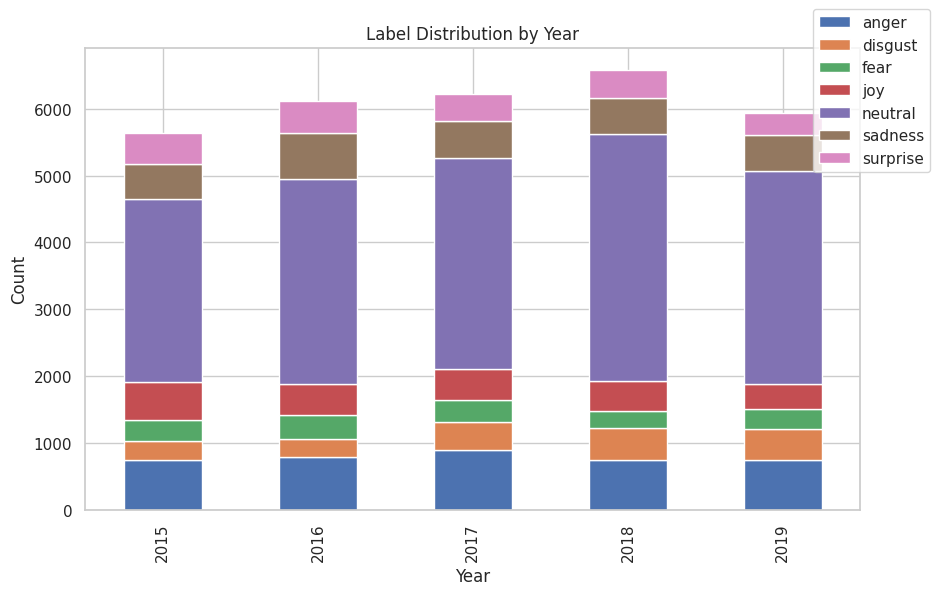

In [ ]:
# year별 label 분포 계산
label_counts = emo_df.groupby('year')['label'].value_counts().unstack()

# 막대 그래프 생성
sns.set(style='whitegrid')
label_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# 그래프 제목 및 축 레이블 설정
plt.title('Label Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# 범례 위치 설정
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# 그래프 출력
plt.show()

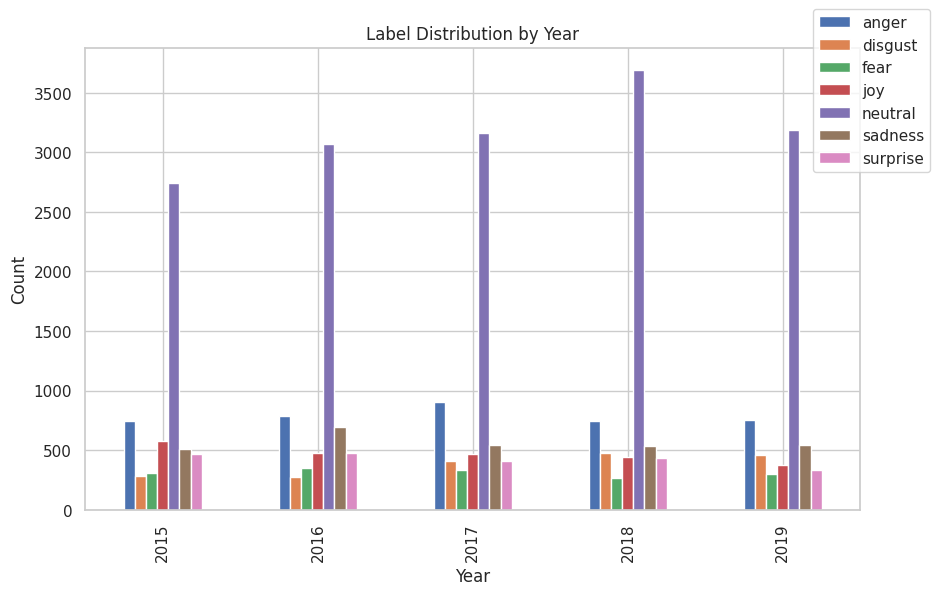

In [ ]:
# year별 label 분포 계산
label_counts = emo_df.groupby('year')['label'].value_counts().unstack()

# 막대 그래프 생성
sns.set(style='whitegrid')
label_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

# 그래프 제목 및 축 레이블 설정
plt.title('Label Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# 범례 위치 설정
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# 그래프 출력
plt.show()

neutral이 타 감정 대비 3~12배 많음

## make data with_emo

In [ ]:
df_2015 = emo_df[emo_df['year']==2015]
df_2016 = emo_df[emo_df['year']==2016]
df_2017 = emo_df[emo_df['year']==2017]
df_2018 = emo_df[emo_df['year']==2018]
df_2019 = emo_df[emo_df['year']==2019]

In [ ]:
print(df_2015.groupby('track_name')['anger','disgust','fear','joy','sadness','surprise','neutral'].sum().idxmax(axis=1).values.tolist().count('neutral'))
print(df_2016.groupby('track_name')['anger','disgust','fear','joy','sadness','surprise','neutral'].sum().idxmax(axis=1).values.tolist().count('neutral'))
print(df_2017.groupby('track_name')['anger','disgust','fear','joy','sadness','surprise','neutral'].sum().idxmax(axis=1).values.tolist().count('neutral'))
print(df_2018.groupby('track_name')['anger','disgust','fear','joy','sadness','surprise','neutral'].sum().idxmax(axis=1).values.tolist().count('neutral'))
print(df_2019.groupby('track_name')['anger','disgust','fear','joy','sadness','surprise','neutral'].sum().idxmax(axis=1).values.tolist().count('neutral'))


86
86
88
95
91


neutral 제외하고 단순합

In [ ]:
def make_data(year):
  df = emo_df[emo_df['year']==year]
  ing = df.groupby('track_name')['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise'].sum()
  ing['total'] = ing[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']].sum(axis=1)
  ing[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']] = ing[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']].apply(lambda x: x/ing['total'])
  ing['prob_emotion'] = ing[['anger','disgust','fear','joy','sadness','surprise']].max(axis=1)
  ing['pred_emotion'] = ing[['anger','disgust','fear','joy','sadness','surprise']].idxmax(axis=1)
  ing.drop(columns=['total'], inplace=True)
  return ing

In [ ]:
_right = make_data(2015)
_right

,anger,disgust,fear,joy,sadness,surprise,prob_emotion,pred_emotion
track_name,,,,,,,,
679 (feat. Remy Boyz),0.199771,0.146629,0.041549,0.288992,0.072010,0.251048,0.288992,joy
7/11,0.455186,0.235417,0.109497,0.052987,0.057902,0.089011,0.455186,anger
Ain't Nobody (Loves Me Better) (feat. Jasmine Thompson),0.079293,0.051574,0.061349,0.406485,0.101210,0.300088,0.406485,joy
All Eyes on You (feat. Chris Brown & Nicki Minaj),0.213466,0.341326,0.045924,0.091919,0.078591,0.228775,0.341326,disgust
All My Friends (feat. Tinashe & Chance the Rapper),0.229925,0.171605,0.070392,0.058041,0.383829,0.086208,0.383829,sadness
...,...,...,...,...,...,...,...,...
Where Are Ü Now (with Justin Bieber),0.198157,0.077012,0.069587,0.115300,0.196950,0.342994,0.342994,surprise
Wildest Dreams,0.106835,0.143769,0.205293,0.317639,0.130724,0.095740,0.317639,joy
Worth It (feat. Kid Ink),0.105765,0.079493,0.149075,0.523244,0.070967,0.071457,0.523244,joy


In [ ]:
_left = pd.read_csv('final/data/top100_2015.csv')
df_final = pd.merge(_left, _right, on=['track_name'], how='left')
df_final

,track_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,added_month,added_day,anger,disgust,fear,joy,sadness,surprise,prob_emotion,pred_emotion
0,Uptown Funk (feat. Bruno Mars),Mark Ronson,85.0,0.856,0.609,0.0,-7.223,1.0,0.0824,0.00801,...,1,Mon,0.159839,0.132768,0.120489,0.191194,0.186690,0.209021,0.209021,surprise
1,Thinking out Loud,Ed Sheeran,86.0,0.781,0.445,2.0,-6.061,1.0,0.0295,0.47400,...,6,Sat,0.206807,0.131047,0.057327,0.293251,0.197516,0.114052,0.293251,joy
2,See You Again (feat. Charlie Puth),Wiz Khalifa,85.0,0.689,0.481,10.0,-7.503,1.0,0.0815,0.36900,...,1,Thu,0.083510,0.100602,0.083694,0.317619,0.257874,0.156701,0.317619,joy
3,What Do You Mean?,Justin Bieber,81.0,0.845,0.567,5.0,-8.118,0.0,0.0956,0.59000,...,11,Fri,0.303523,0.145067,0.077636,0.040784,0.117383,0.315607,0.315607,surprise
4,Lean On,Major Lazer,77.0,0.723,0.809,7.0,-3.081,0.0,0.0625,0.00346,...,11,Fri,0.394515,0.069068,0.064552,0.316480,0.079431,0.075954,0.394515,anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Barcelona,George Ezra,71.0,0.629,0.572,5.0,-9.332,1.0,0.0307,0.32000,...,6,Mon,0.349742,0.139099,0.172175,0.049666,0.215908,0.073410,0.349742,anger
96,Slow Motion,Trey Songz,71.0,0.733,0.408,7.0,-7.834,0.0,0.0388,0.67900,...,6,Tue,0.102322,0.154466,0.102664,0.186375,0.123981,0.330192,0.330192,surprise
97,Cheerleader - Felix Jaehn Remix Radio Edit,OMI,70.0,0.780,0.680,4.0,-6.081,1.0,0.0305,0.14100,...,10,Fri,0.133419,0.119895,0.051608,0.345430,0.092214,0.257434,0.345430,joy
98,Same Old Love,Selena Gomez,70.0,0.672,0.593,11.0,-4.010,0.0,0.0304,0.02230,...,10,Fri,0.063899,0.093552,0.079103,0.015540,0.402422,0.345485,0.402422,sadness


In [ ]:
df_final.to_csv('final/data/with_emo_2015.csv', index=False)

# ANAYLSIS

### 데이터 병합 (실행 x)

In [ ]:
os.listdir('final/data')

['top100_2017.csv',
 'top100_2016.csv',
 'top100_2015.csv',
 'top100_2018.csv',
 'billboardHot100_1999-2019.csv',
 'top100_2015_lyrics.csv',
 'top100_2016_lyrics.csv',
 'top100_2017_lyrics.csv',
 'top100_2018_lyrics.csv',
 'top100_2019.csv',
 'top100_2019_lyrics.csv',
 'lyrics_2016.csv',
 'lyrics_2015.csv',
 'lyrics_2017.csv',
 'lyrics_2018.csv',
 'lyrics_2019.csv',
 'lyrics_1519.csv',
 'EMOTIONS_1519.csv',
 'with_emo_2019.csv',
 'with_emo_2018.csv',
 'with_emo_2017.csv',
 'with_emo_2016.csv',
 'with_emo_2015.csv']

In [ ]:
### 디렉토리 내 파일 병합
directory_path = 'final/data'  # CSV 파일이 있는 디렉토리 경로를 지정

# 디렉토리에서 CSV 파일 목록 가져오기
#csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
csv_files = [file for file in os.listdir(directory_path) if 'with_emo' in file and file.endswith('.csv')]


# 파일들을 병합하여 결과 데이터프레임 생성
combined_df = pd.DataFrame()  # 빈 데이터프레임 생성

for file in csv_files:
    df = pd.read_csv(os.path.join(directory_path, file))
    # 컬럼명을 소문자로 통일
    df.columns = map(str.lower, df.columns)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

In [ ]:
combined_df

,track_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,added_month,added_day,anger,disgust,fear,joy,sadness,surprise,prob_emotion,pred_emotion
0,Old Town Road - Remix,Lil Nas X,80.0,0.878,0.619,6.0,-5.560,1.0,0.1020,0.0533,...,6,Fri,0.232579,0.146238,0.152115,0.168469,0.160648,0.139951,0.232579,anger
1,bad guy,Billie Eilish,85.0,0.701,0.425,7.0,-10.965,1.0,0.3750,0.3280,...,3,Fri,0.187535,0.421619,0.082860,0.104895,0.156287,0.046803,0.421619,disgust
2,Señorita,Shawn Mendes,83.0,0.759,0.548,9.0,-6.049,0.0,0.0290,0.0392,...,6,Wed,0.062083,0.103979,0.102877,0.306972,0.287127,0.136963,0.306972,joy
3,7 rings,Ariana Grande,86.0,0.778,0.317,1.0,-10.732,0.0,0.3340,0.5920,...,2,Fri,0.149837,0.158068,0.043229,0.306978,0.216974,0.124914,0.306978,joy
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,87.0,0.755,0.522,2.0,-4.368,1.0,0.0575,0.5330,...,9,Fri,0.184976,0.196083,0.171520,0.081385,0.206453,0.159582,0.206453,sadness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Barcelona,George Ezra,71.0,0.629,0.572,5.0,-9.332,1.0,0.0307,0.3200,...,6,Mon,0.349742,0.139099,0.172175,0.049666,0.215908,0.073410,0.349742,anger
496,Slow Motion,Trey Songz,71.0,0.733,0.408,7.0,-7.834,0.0,0.0388,0.6790,...,6,Tue,0.102322,0.154466,0.102664,0.186375,0.123981,0.330192,0.330192,surprise
497,Cheerleader - Felix Jaehn Remix Radio Edit,OMI,70.0,0.780,0.680,4.0,-6.081,1.0,0.0305,0.1410,...,10,Fri,0.133419,0.119895,0.051608,0.345430,0.092214,0.257434,0.345430,joy
498,Same Old Love,Selena Gomez,70.0,0.672,0.593,11.0,-4.010,0.0,0.0304,0.0223,...,10,Fri,0.063899,0.093552,0.079103,0.015540,0.402422,0.345485,0.402422,sadness


In [ ]:
combined_df.pred_emotion.unique()

array(['anger', 'disgust', 'joy', 'sadness', 'surprise', 'fear', nan],
      dtype=object)

In [ ]:
#combined_df.to_csv('final/data/combined_data.csv', index=False)

### 데이터 로드

In [6]:
combined_df = pd.read_csv('final/data/combined_data.csv')
combined_df

,track_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,added_month,added_day,anger,disgust,fear,joy,sadness,surprise,prob_emotion,pred_emotion
0,Old Town Road - Remix,Lil Nas X,80.0,0.878,0.619,6.0,-5.560,1.0,0.1020,0.0533,...,6,Fri,0.232579,0.146238,0.152115,0.168469,0.160648,0.139951,0.232579,anger
1,bad guy,Billie Eilish,85.0,0.701,0.425,7.0,-10.965,1.0,0.3750,0.3280,...,3,Fri,0.187535,0.421619,0.082860,0.104895,0.156287,0.046803,0.421619,disgust
2,Señorita,Shawn Mendes,83.0,0.759,0.548,9.0,-6.049,0.0,0.0290,0.0392,...,6,Wed,0.062083,0.103979,0.102877,0.306972,0.287127,0.136963,0.306972,joy
3,7 rings,Ariana Grande,86.0,0.778,0.317,1.0,-10.732,0.0,0.3340,0.5920,...,2,Fri,0.149837,0.158068,0.043229,0.306978,0.216974,0.124914,0.306978,joy
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,87.0,0.755,0.522,2.0,-4.368,1.0,0.0575,0.5330,...,9,Fri,0.184976,0.196083,0.171520,0.081385,0.206453,0.159582,0.206453,sadness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Barcelona,George Ezra,71.0,0.629,0.572,5.0,-9.332,1.0,0.0307,0.3200,...,6,Mon,0.349742,0.139099,0.172175,0.049666,0.215908,0.073410,0.349742,anger
496,Slow Motion,Trey Songz,71.0,0.733,0.408,7.0,-7.834,0.0,0.0388,0.6790,...,6,Tue,0.102322,0.154466,0.102664,0.186375,0.123981,0.330192,0.330192,surprise
497,Cheerleader - Felix Jaehn Remix Radio Edit,OMI,70.0,0.780,0.680,4.0,-6.081,1.0,0.0305,0.1410,...,10,Fri,0.133419,0.119895,0.051608,0.345430,0.092214,0.257434,0.345430,joy
498,Same Old Love,Selena Gomez,70.0,0.672,0.593,11.0,-4.010,0.0,0.0304,0.0223,...,10,Fri,0.063899,0.093552,0.079103,0.015540,0.402422,0.345485,0.402422,sadness


### 1) 감정과 성과의 관계
- 어떤 감정일 때 성과가 큰가?
- 감정 사이의 편차가 클수록/작을수록 즉, 감정이 단순할수록/복합적일수록 성과가 달라지는가?

In [7]:
DV = ['popularity']
audio_features = ['danceability','enery','key','loudness','mode','speechiness',
                  'acousticness','instrumentalness','liveness','valence','tempo',
                  'duration_ms']
emo_features = ['anger','fear','joy','disgust','sadness','surprise']

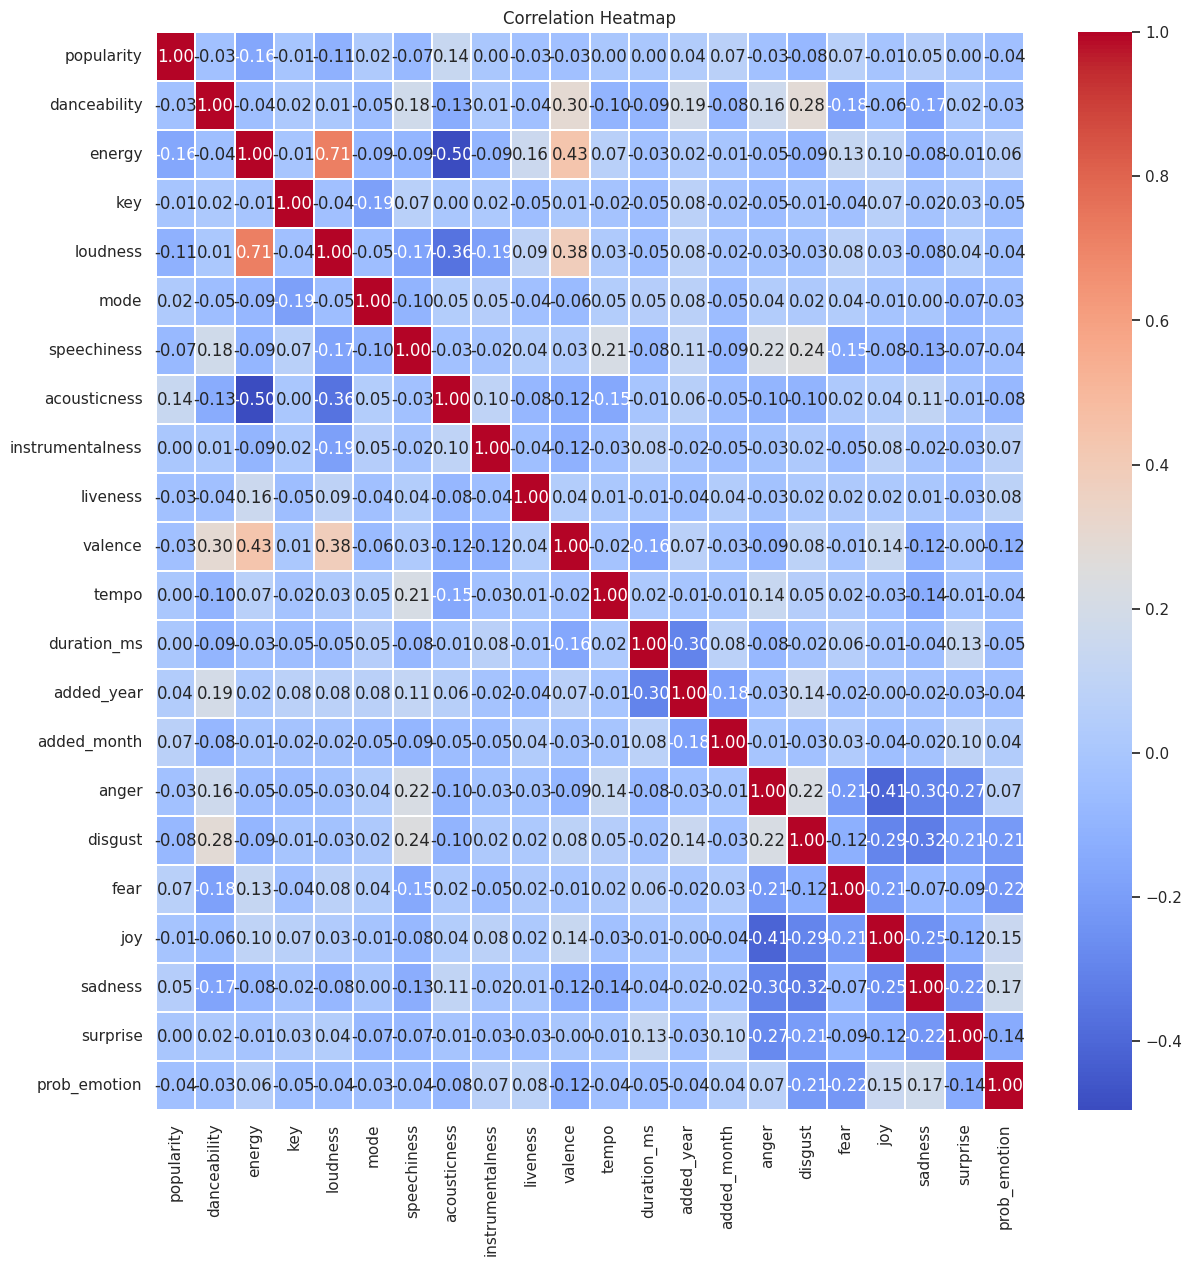

In [ ]:
# 데이터프레임에서 수치형 컬럼들을 선택하여 상관 관계 행렬 생성
numeric_columns = combined_df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

# 히트맵 그리기
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, linewidths=0.01, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

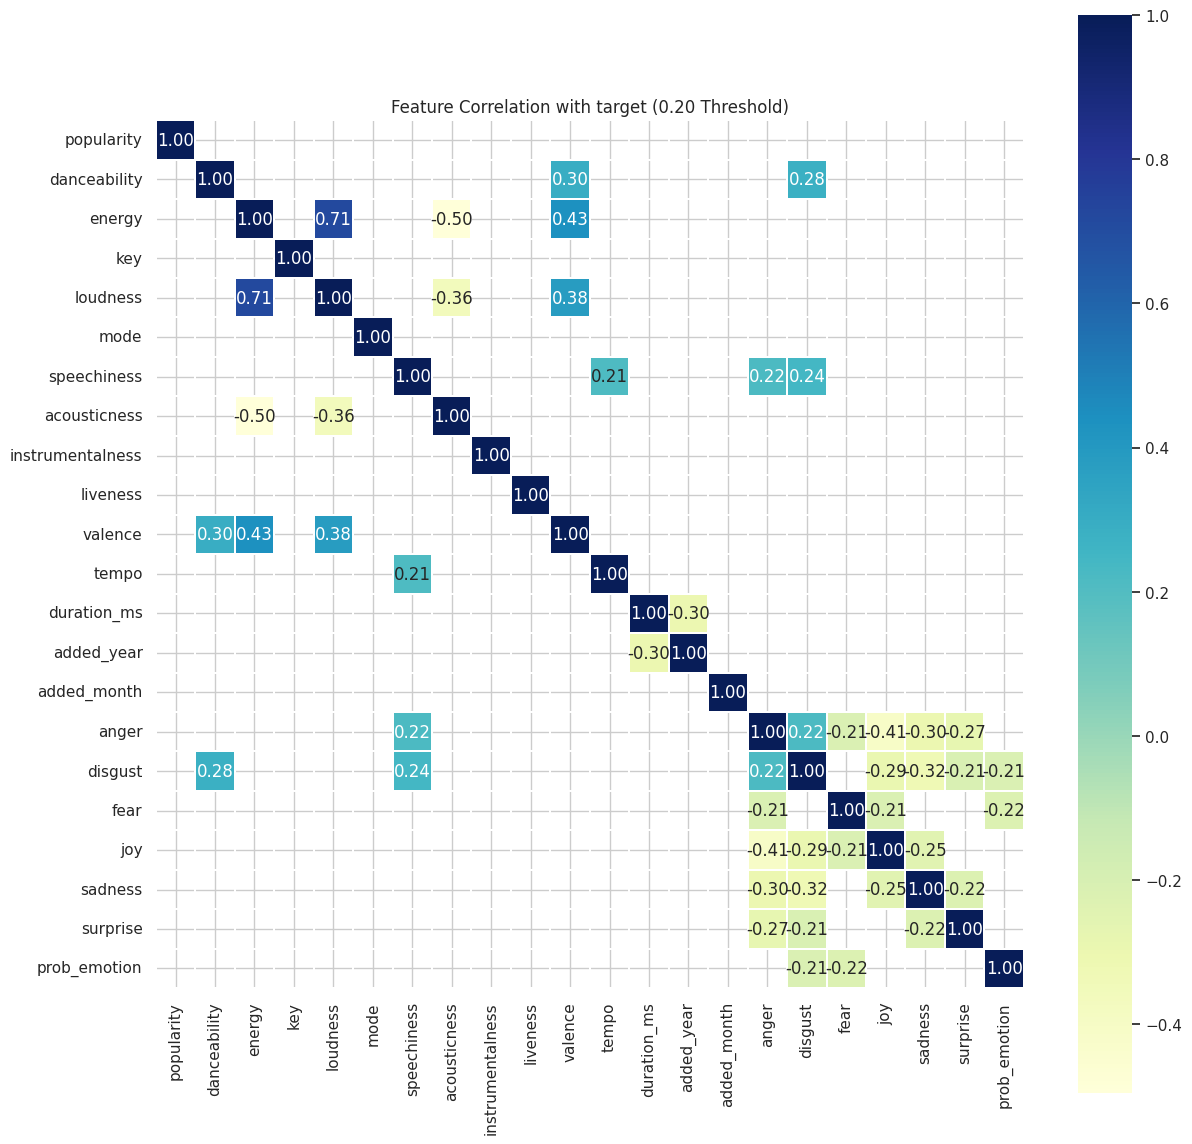

In [ ]:
# 데이터프레임에서 수치형 컬럼들을 선택하여 상관 관계 행렬 생성
numeric_columns = combined_df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

# 절대값이 0.5 이상인 상관계수 필터링
corr_high = correlation_matrix[abs(correlation_matrix) >= 0.2]

# 상관성 히트맵 그리기
plt.figure(figsize=(14, 14));
sns.heatmap(corr_high, linewidths=0.01,
            square=True, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Feature Correlation with target (0.20 Threshold)')
plt.show()

anger, dusgust와 speechiness의 관계

disgust와 danceability의 관계

added_year와 durationi_ms의 관계

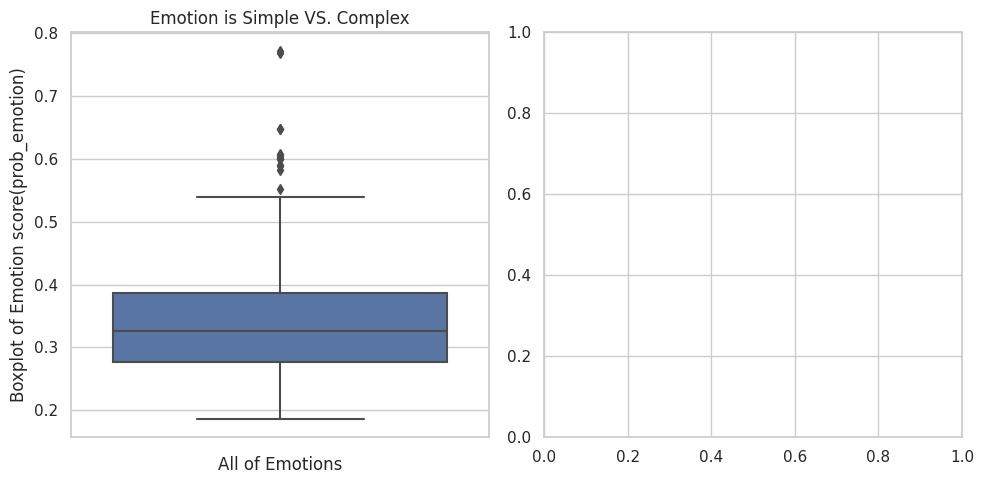

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.boxplot(data=combined_df, y='prob_emotion', ax=ax[0])
ax[0].set_xlabel('All of Emotions')
ax[0].set_ylabel('Boxplot of Emotion score(prob_emotion)')
ax[0].set_title('Emotion is Simple VS. Complex')

plt.tight_layout()
plt.show()

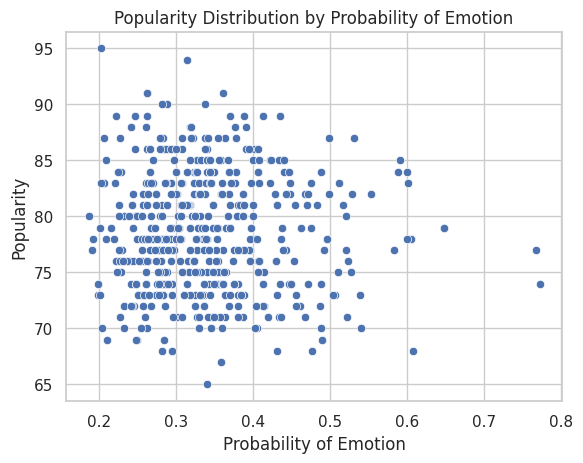

In [ ]:
# 산점도 그리기
sns.scatterplot(data=combined_df, x='prob_emotion', y='popularity')
plt.xlabel('Probability of Emotion')
plt.ylabel('Popularity')
plt.title('Popularity Distribution by Probability of Emotion')
plt.show()

In [25]:
combined_df.groupby('added_day').size()/combined_df.shape[0]

added_day
Fri    0.754
Mon    0.042
Sat    0.016
Sun    0.014
Thu    0.090
Tue    0.054
Wed    0.030
dtype: float64

In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        500 non-null    object 
 1   artist_name       500 non-null    object 
 2   popularity        500 non-null    float64
 3   danceability      500 non-null    float64
 4   energy            500 non-null    float64
 5   key               500 non-null    float64
 6   loudness          500 non-null    float64
 7   mode              500 non-null    float64
 8   speechiness       500 non-null    float64
 9   acousticness      500 non-null    float64
 10  instrumentalness  500 non-null    float64
 11  liveness          500 non-null    float64
 12  valence           500 non-null    float64
 13  tempo             500 non-null    float64
 14  type              500 non-null    object 
 15  duration_ms       500 non-null    float64
 16  added_year        500 non-null    int64  
 1

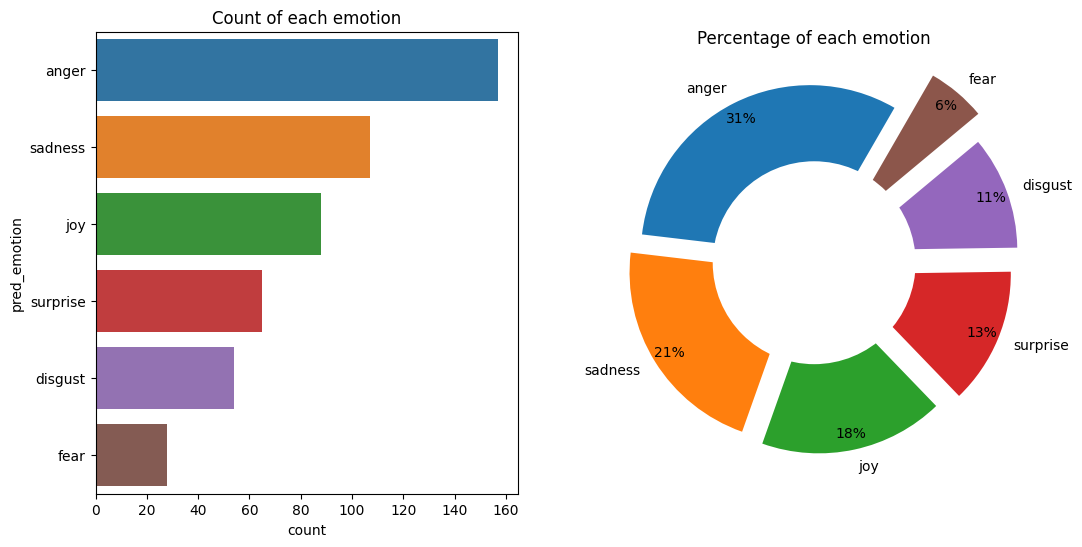

In [21]:
data = combined_df
col = 'pred_emotion'

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

explode = list((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts())))[::-1])[:10]
labels = list(data[col].dropna().value_counts().index)[:10]
sizes = data[col].value_counts()[:10]
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))

sorted_col = data[col].value_counts().sort_values(ascending=False).index
sns.countplot(y= col, data=data, order=sorted_col, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

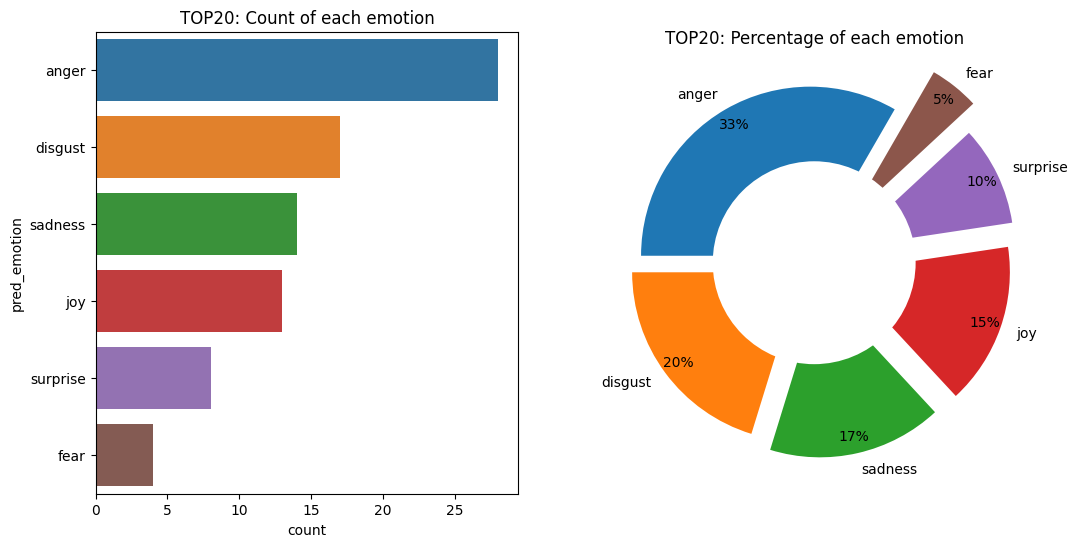

In [17]:
data = combined_df[combined_df['added_year']==2019]
col = 'pred_emotion'

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

explode = list((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts())))[::-1])[:10]
labels = list(data[col].dropna().value_counts().index)[:10]
sizes = data[col].value_counts()[:10]
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))

sorted_col = data[col].value_counts().sort_values(ascending=False).index
sns.countplot(y= col, data=data, order=sorted_col, ax=ax1)
ax1.set_title("TOP20: Count of each emotion")
ax2.set_title("TOP20: Percentage of each emotion")
plt.show()

In [22]:
combined_df.sort_values('popularity', ascending=False).iloc[:10]

,track_name,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,added_month,added_day,anger,disgust,fear,joy,sadness,surprise,prob_emotion,pred_emotion
5,Cruel Summer,Taylor Swift,95.0,0.552,0.702,9.0,-5.707,1.0,0.1570,0.11700,...,8,Fri,0.195523,0.201873,0.153368,0.097198,0.156683,0.195356,0.201873,disgust
300,Starboy,The Weeknd,94.0,0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,...,11,Fri,0.313615,0.165484,0.056377,0.264486,0.092237,0.107801,0.313615,anger
9,lovely (with Khalid),Billie Eilish,91.0,0.351,0.296,4.0,-10.109,0.0,0.0333,0.93400,...,4,Thu,0.060780,0.061359,0.220804,0.138581,0.262306,0.256170,0.262306,sadness
102,lovely (with Khalid),Billie Eilish,91.0,0.351,0.296,4.0,-10.109,0.0,0.0333,0.93400,...,4,Thu,0.060780,0.061359,0.220804,0.138581,0.262306,0.256170,0.262306,sadness
209,Perfect,Ed Sheeran,91.0,0.599,0.448,8.0,-6.312,1.0,0.0232,0.16300,...,3,Fri,0.142021,0.123436,0.155251,0.360224,0.108606,0.110462,0.360224,joy
11,Lover,Taylor Swift,90.0,0.359,0.543,7.0,-7.582,1.0,0.0919,0.49200,...,8,Fri,0.154190,0.081644,0.199675,0.111940,0.170995,0.281555,0.281555,surprise
10,Someone You Loved,Lewis Capaldi,90.0,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,...,5,Fri,0.288649,0.154099,0.160602,0.158665,0.166493,0.071491,0.288649,anger
201,Believer,Imagine Dragons,90.0,0.776,0.780,10.0,-4.374,0.0,0.1280,0.06220,...,6,Fri,0.337512,0.107297,0.126616,0.098184,0.131166,0.199225,0.337512,anger
306,Pink + White,Frank Ocean,89.0,0.545,0.545,9.0,-7.362,1.0,0.1070,0.66700,...,8,Sat,0.135385,0.170641,0.182821,0.195465,0.221524,0.094164,0.221524,sadness
301,One Dance,Drake,89.0,0.792,0.625,1.0,-5.609,1.0,0.0536,0.00776,...,5,Fri,0.246770,0.075262,0.114427,0.184431,0.220627,0.158483,0.246770,anger


In [14]:
combined_df['pred_emotion'].dropna().value_counts().index

Index(['anger', 'sadness', 'joy', 'surprise', 'disgust', 'fear'], dtype='object')

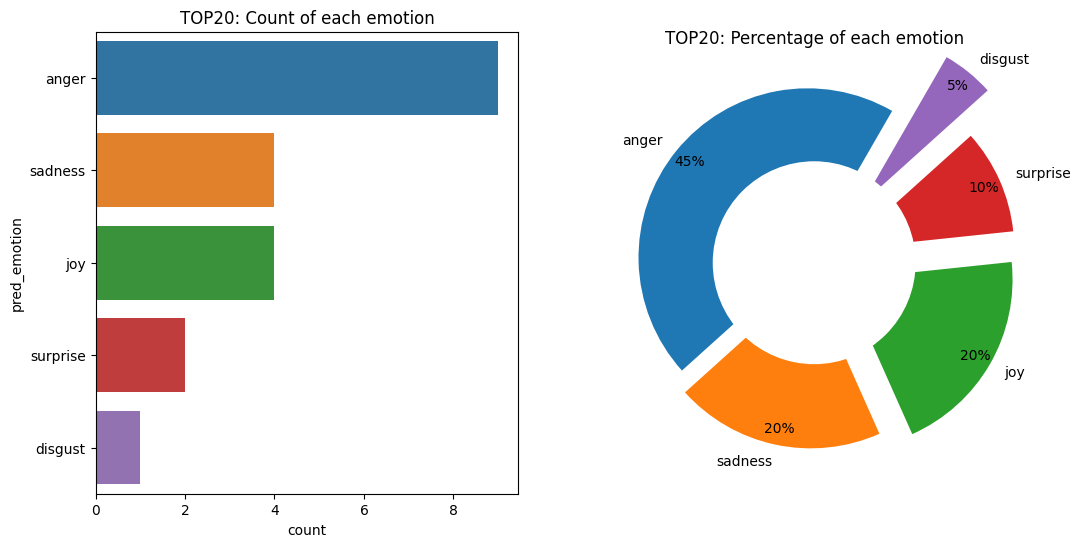

In [16]:
data = combined_df.sort_values('popularity', ascending=False).iloc[:20]
col = 'pred_emotion'

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

explode = list((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts())))[::-1])[:10]
labels = list(data[col].dropna().value_counts().index)[:10]
sizes = data[col].value_counts()[:10]
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))

sorted_col = data[col].value_counts().sort_values(ascending=False).index
sns.countplot(y= col, data=data, order=sorted_col, ax=ax1)
ax1.set_title("TOP20: Count of each emotion")
ax2.set_title("TOP20: Percentage of each emotion")
plt.show()

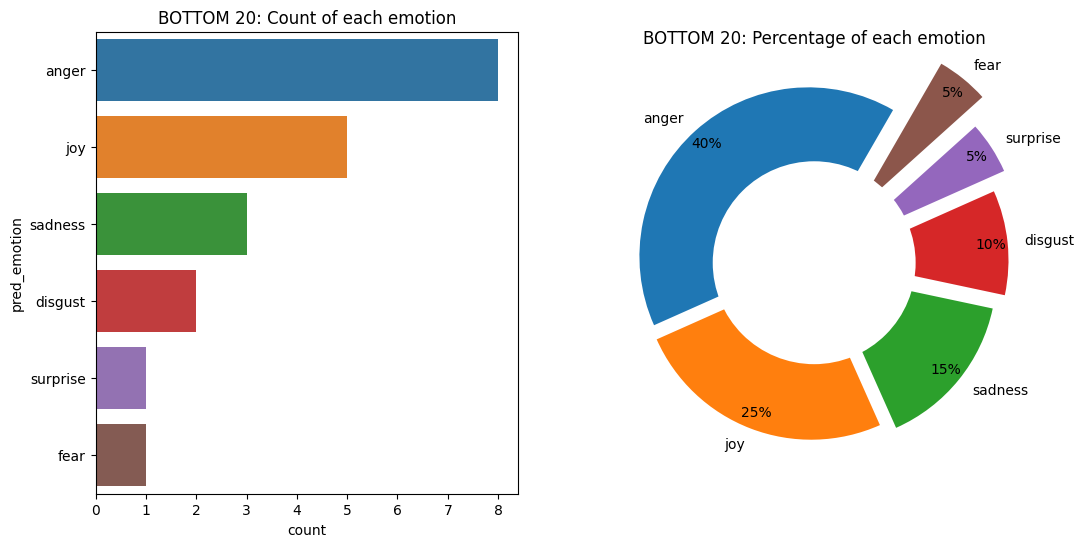

In [19]:
data = combined_df.sort_values('popularity', ascending=True).iloc[:20]
col = 'pred_emotion'

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

explode = list((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts())))[::-1])[:10]
labels = list(data[col].dropna().value_counts().index)[:10]
sizes = data[col].value_counts()[:10]
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))

sorted_col = data[col].value_counts().sort_values(ascending=False).index
sns.countplot(y= col, data=data, order=sorted_col, ax=ax1)
ax1.set_title("BOTTOM 20: Count of each emotion")
ax2.set_title("BOTTOM 20: Percentage of each emotion")
plt.show()

In [ ]:
sns.boxplot(data=combined_df, x='pred_emotion', y='tempo', showfliers=False)
plt.show()

In [ ]:
combined_df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,duration_ms,added_year,added_month,anger,disgust,fear,joy,sadness,surprise,prob_emotion
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.00000,500.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,78.568000,0.683174,0.645235,5.406000,-6.008970,0.584000,0.107827,0.186476,0.005643,0.163392,...,213907.190000,2016.84800,6.326000,0.215918,0.156498,0.122075,0.160269,0.187658,0.157581,0.340335
std,5.284053,0.132343,0.155911,3.609324,2.073458,0.493387,0.099587,0.215572,0.044389,0.120066,...,35752.256125,2.40759,3.409248,0.108171,0.075967,0.074544,0.121738,0.113089,0.092121,0.089300
min,65.000000,0.259000,0.056500,0.000000,-15.099000,0.000000,0.023200,0.000239,0.000000,0.021500,...,113000.000000,1975.00000,1.000000,0.033148,0.028506,0.018085,0.008369,0.038873,0.020151,0.186431
25%,74.000000,0.600000,0.556250,2.000000,-7.051250,0.000000,0.044800,0.029850,0.000000,0.093250,...,192173.250000,2016.00000,4.000000,0.135337,0.098472,0.065711,0.072750,0.106788,0.091452,0.277272
50%,78.000000,0.688000,0.657000,6.000000,-5.678000,1.000000,0.066250,0.093300,0.000000,0.118000,...,211148.500000,2017.00000,6.000000,0.195932,0.146000,0.102877,0.126851,0.159954,0.131286,0.326658
75%,83.000000,0.775250,0.765250,8.000000,-4.626000,1.000000,0.126000,0.271000,0.000017,0.193500,...,230253.500000,2018.00000,10.000000,0.287071,0.201635,0.158529,0.201454,0.236541,0.201947,0.386702
max,95.000000,0.963000,0.953000,11.000000,-2.253000,1.000000,0.530000,0.978000,0.809000,0.817000,...,417920.000000,2021.00000,12.000000,0.582658,0.491917,0.447114,0.647634,0.771841,0.498048,0.771841
